# Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


## Tratamento dos Dados, com objetivo de otimizar as etapas posteriores que serão:
- Analisar o Faturamento Total de Cada Loja
- Vendas por Categoria
- Média de Avaliação por Loja
- Produtos Mais e Menos Vendidos
- Frete Médio por Loja

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# Adicionando coluna de identificação da loja (sem alterar a importação original)
loja['loja'] = 'Loja_1'
loja2['loja'] = 'Loja_2'
loja3['loja'] = 'Loja_3'
loja4['loja'] = 'Loja_4'

In [4]:
# Unindo todos os DataFrames em uma única base
df_geral = pd.concat([loja, loja2, loja3, loja4])

In [5]:
regioes_siglas = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'BA': 'Nordeste',
    'SE': 'Nordeste',
    'AL': 'Nordeste',
    'PE': 'Nordeste',
    'PB': 'Nordeste',
    'RN': 'Nordeste',
    'CE': 'Nordeste',
    'PI': 'Nordeste',
    'MA': 'Nordeste',
    'PR': 'Sul',
    'SC': 'Sul',
    'RS': 'Sul',
    'MS': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'GO': 'Centro-Oeste',
    'DF': 'Centro-Oeste',
    'AM': 'Norte',
    'PA': 'Norte',
    'AP': 'Norte',
    'RR': 'Norte',
    'TO': 'Norte',
    'RO': 'Norte',
    'AC': 'Norte'
}

In [64]:
df_geral['Região'] = df_geral['Local da compra'].map(regioes_siglas)

In [65]:
df_geral.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja,AnoMes,Ano,Região
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja_1,2021-01,2021,Sudeste
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja_1,2022-05,2022,Sudeste
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja_1,2021-03,2021,Centro-Oeste
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja_1,2022-05,2022,Sul
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja_1,2020-11,2020,Sudeste


In [8]:
# Unindo todos os DataFrames em uma única base
df_geral = pd.concat([loja, loja2, loja3, loja4])

In [66]:
# Exibir 5 linhas de cada loja para validar que temos as informações de todas as lojas no Dataframe
amostra_lojas = df_geral.groupby('loja').head(5)
amostra_lojas

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja,AnoMes,Ano,Região
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja_1,2021-01,2021,Sudeste
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja_1,2022-05,2022,Sudeste
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja_1,2021-03,2021,Centro-Oeste
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja_1,2022-05,2022,Sul
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja_1,2020-11,2020,Sudeste
0,Cadeira de escritório,moveis,378.20,20.421138,2021-08-04,Thiago Silva,MG,1,boleto,1,-18.10,-44.38,Loja_2,2021-08,2021,Sudeste
1,Pandeiro,instrumentos musicais,102.37,3.035334,2020-11-26,Bianca Santos,RJ,3,cartao_credito,4,-22.25,-42.66,Loja_2,2020-11,2020,Sudeste
2,Cama king,moveis,591.13,31.759020,2021-10-22,Thiago Silva,SC,5,cartao_credito,10,-27.45,-50.95,Loja_2,2021-10,2021,Sul
3,Cama king,moveis,1208.24,61.919584,2022-05-04,Larissa Alves,RS,5,cartao_credito,10,-30.17,-53.50,Loja_2,2022-05,2022,Sul
4,Cadeira de escritório,moveis,530.41,25.827176,2022-02-26,Lucas Oliveira,SP,4,cartao_credito,3,-22.19,-48.79,Loja_2,2022-02,2022,Sudeste


In [10]:
# Garantir que a coluna de data está em formato datetime
df_geral['Data da Compra'] = pd.to_datetime(df_geral['Data da Compra'])

# Criar coluna com o mês da venda
df_geral['AnoMes'] = df_geral['Data da Compra'].dt.to_period('M')

# Agrupando o faturamento mensal por loja
faturamento_mensal = df_geral.groupby(['AnoMes', 'loja'])['Preço'].sum().reset_index()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21188\4261874279.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_geral['Data da Compra'] = pd.to_datetime(df_geral['Data da Compra'])


In [67]:
df_geral

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja,AnoMes,Ano,Região
0,Assistente virtual,eletronicos,219.08,9.249790,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja_1,2021-01,2021,Sudeste
1,Mesa de jantar,moveis,256.35,11.234305,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja_1,2022-05,2022,Sudeste
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja_1,2021-03,2021,Centro-Oeste
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja_1,2022-05,2022,Sul
4,Cadeira de escritório,moveis,446.99,26.964689,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja_1,2020-11,2020,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,Mesa de jantar,moveis,303.60,16.852799,2020-02-12,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja_4,2020-02,2020,Sudeste
2354,Cadeira de escritório,moveis,456.02,24.812798,2022-05-17,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja_4,2022-05,2022,Nordeste
2355,Copo térmico,esporte e lazer,48.99,3.139675,2022-05-03,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja_4,2022-05,2022,Sudeste
2356,Jogo de panelas,utilidades domesticas,202.45,11.062979,2020-06-15,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja_4,2020-06,2020,Sul


# 1. Análise do faturamento


In [12]:
# Valor total por loja
faturamento_por_loja = df_geral.groupby('loja')['Preço'].sum().round(2)

In [13]:
# Calculando o faturamento total das lojas
faturamento_total = faturamento_por_loja.sum()

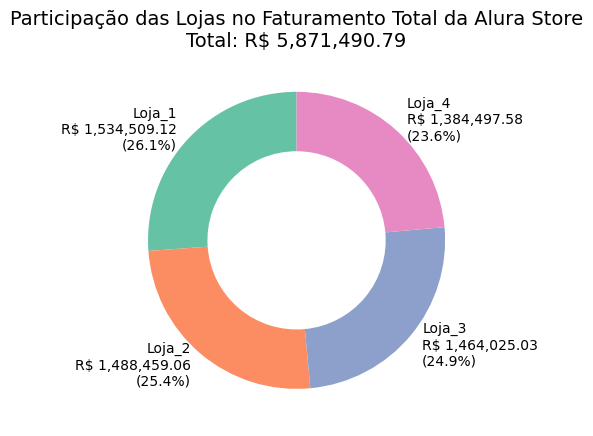

In [14]:
# Valor total geral com nome da loja, valor e percentual

labels = [f'{loja}\nR$ {valor:,.2f}\n({(valor/faturamento_total)*100:.1f}%)' 
          for loja, valor in faturamento_por_loja.items()]

# Gráfico
plt.figure(figsize=(5, 5))
plt.pie(faturamento_por_loja, labels=labels, startangle=90, 
        colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'],
        wedgeprops=dict(width=0.4))  # Estilo "donut" elegante

plt.title(f'Participação das Lojas no Faturamento Total da Alura Store\nTotal: R$ {faturamento_total:,.2f}', fontsize=14)
plt.tight_layout()
plt.show()

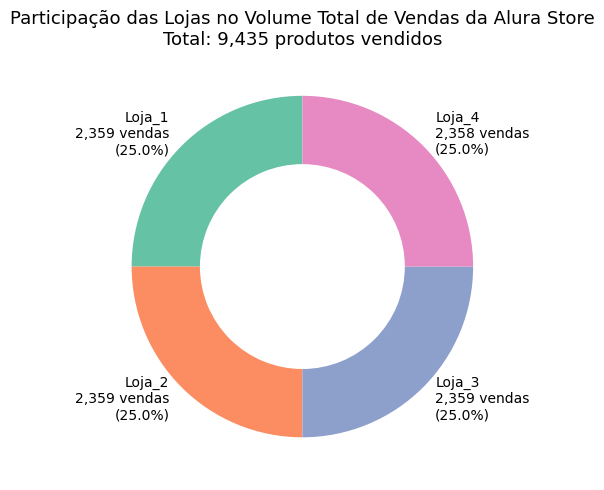

In [15]:
# 📦 Volume de vendas por loja
volume_por_loja = df_geral['loja'].value_counts()
volume_total = volume_por_loja.sum()

# 🏷️ Labels com nome, volume e percentual
labels_volume = [f'{loja}\n{quantidade:,} vendas\n({(quantidade/volume_total)*100:.1f}%)' 
                 for loja, quantidade in volume_por_loja.items()]

# 📊 Gráfico de pizza (donut)
plt.figure(figsize=(5, 5))
plt.pie(volume_por_loja, labels=labels_volume, startangle=90,
        colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'],
        wedgeprops=dict(width=0.4))  # Estilo donut

plt.title(f'Participação das Lojas no Volume Total de Vendas da Alura Store\nTotal: {volume_total:,} produtos vendidos', fontsize=13)
plt.tight_layout()
plt.show()


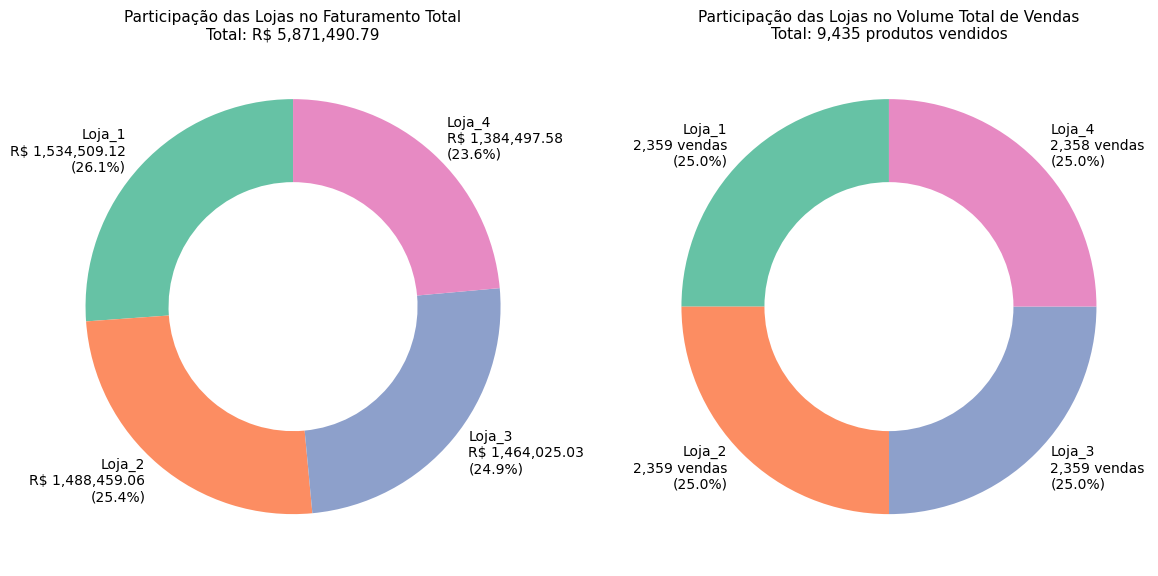

In [16]:
import matplotlib.pyplot as plt

# 🔢 Faturamento por loja
faturamento_por_loja = df_geral.groupby('loja')['Preço'].sum()
faturamento_total = faturamento_por_loja.sum()

# 🏷️ Labels do faturamento
labels_faturamento = [f'{loja}\nR$ {valor:,.2f}\n({(valor/faturamento_total)*100:.1f}%)' 
                      for loja, valor in faturamento_por_loja.items()]

# 🔢 Volume de vendas por loja
volume_por_loja = df_geral['loja'].value_counts()
volume_total = volume_por_loja.sum()

# 🏷️ Labels do volume
labels_volume = [f'{loja}\n{quantidade:,} vendas\n({(quantidade/volume_total)*100:.1f}%)' 
                 for loja, quantidade in volume_por_loja.items()]

# 🎨 Cores padronizadas
cores = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# 📊 Criação dos gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 📌 Gráfico 1: Faturamento
axs[0].pie(faturamento_por_loja, labels=labels_faturamento, startangle=90,
           colors=cores, wedgeprops=dict(width=0.4))
axs[0].set_title(f'Participação das Lojas no Faturamento Total\nTotal: R$ {faturamento_total:,.2f}', fontsize=11)

# 📌 Gráfico 2: Volume
axs[1].pie(volume_por_loja, labels=labels_volume, startangle=90,
           colors=cores, wedgeprops=dict(width=0.4))
axs[1].set_title(f'Participação das Lojas no Volume Total de Vendas\nTotal: {volume_total:,} produtos vendidos', fontsize=11)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [17]:
# Contagem de vendas por categoria
vendas_categoria = df_geral['Categoria do Produto'].value_counts().reset_index()
vendas_categoria.columns = ['Categoria do Produto', 'quantidade']


In [18]:
# Cálculo do percentual
vendas_categoria['percentual'] = (vendas_categoria['quantidade'] / vendas_categoria['quantidade'].sum()) * 100

In [19]:
# Cálculo do faturamento total por categoria
faturamento_categoria = df_geral.groupby('Categoria do Produto')['Preço'].sum().reset_index()
faturamento_categoria.columns = ['Categoria do Produto', 'faturamento']

In [20]:
# Juntando tudo
vendas_categoria = vendas_categoria.merge(faturamento_categoria, on='Categoria do Produto')

In [21]:
# Arredondando e reordenando colunas
vendas_categoria['percentual'] = np.ceil(vendas_categoria['percentual'] * 100) / 100
vendas_categoria = vendas_categoria.round({'percentual': 2, 'faturamento': 2})

In [22]:
# Ordenando pelas colunas desejadas
vendas_categoria = vendas_categoria.sort_values(by=['quantidade', 'faturamento', 'percentual'], ascending=False)

In [23]:
# Adicionando linha de total
total_row = pd.DataFrame({
    'Categoria do Produto': ['TOTAL'],
    'quantidade': [vendas_categoria['quantidade'].sum()],
    'faturamento': [vendas_categoria['faturamento'].sum()],
    'percentual': [vendas_categoria['percentual'].sum()]
})

In [99]:
# Concatenando a linha total à tabela
vendas_categoria = pd.concat([vendas_categoria, total_row], ignore_index=True)

vendas_categoria.round(1)

,Categoria do Produto,quantidade,percentual,faturamento
0,moveis,1886,20.0,1010214.0
1,eletronicos,1772,18.8,2214099.7
2,brinquedos,1290,13.7,98140.9
3,eletrodomesticos,1149,12.2,1766337.0
4,esporte e lazer,1113,11.8,190635.4
5,instrumentos musicais,753,8.0,465029.7
6,livros,742,7.9,50260.7
7,utilidades domesticas,730,7.7,76773.4
8,TOTAL,9435,100.0,5871490.8
9,TOTAL,9435,100.0,5871490.8


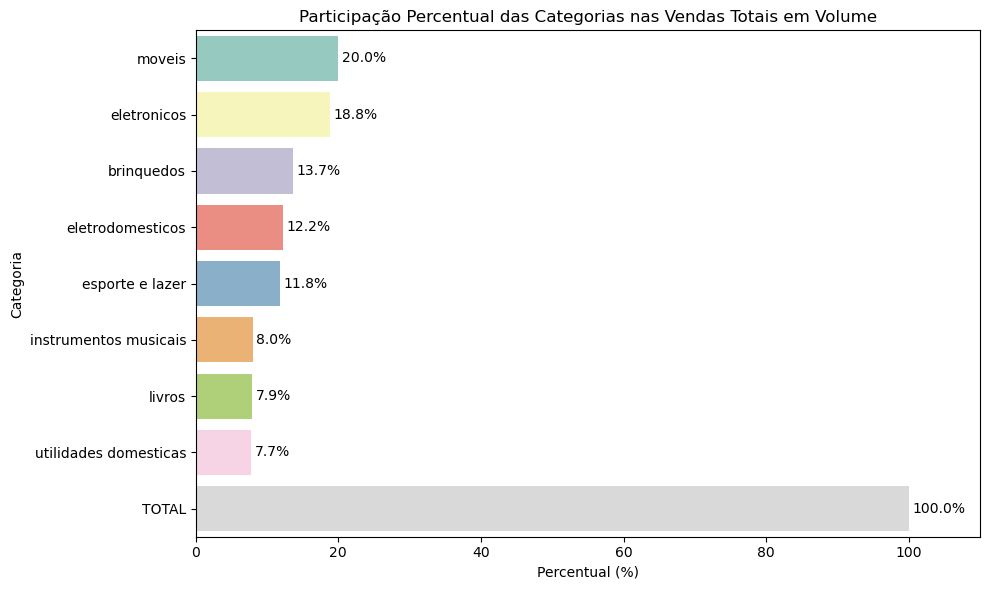

In [25]:
# Gráfico de barras com percentual
plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_categoria, x='percentual', y='Categoria do Produto', palette='Set3', legend=False, hue='Categoria do Produto')

# 1️⃣ Agrupar por Loja e Categoria do Produto
df_agg = df_geral.groupby(['loja', 'Categoria do Produto']).agg(
    quantidade_vendida=('Produto', 'count'),
    faturamento=('Preço', 'sum')
).reset_index()

for i, row in vendas_categoria.iterrows():
    plt.text(row['percentual'] + 0.5, i, f"{row['percentual']:.1f}%", va='center')
    
plt.xlim(0, 110)

plt.title('Participação Percentual das Categorias nas Vendas Totais em Volume')
plt.xlabel('Percentual (%)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

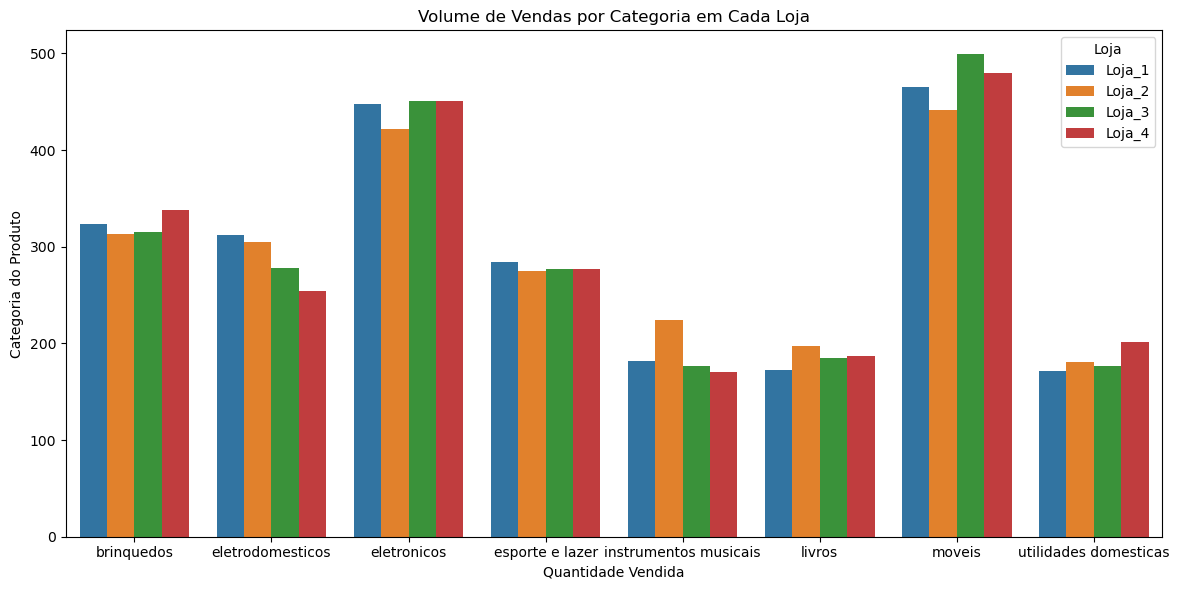

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_agg, x='Categoria do Produto', y='quantidade_vendida', hue='loja', dodge=True)
plt.title('Volume de Vendas por Categoria em Cada Loja')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria do Produto')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

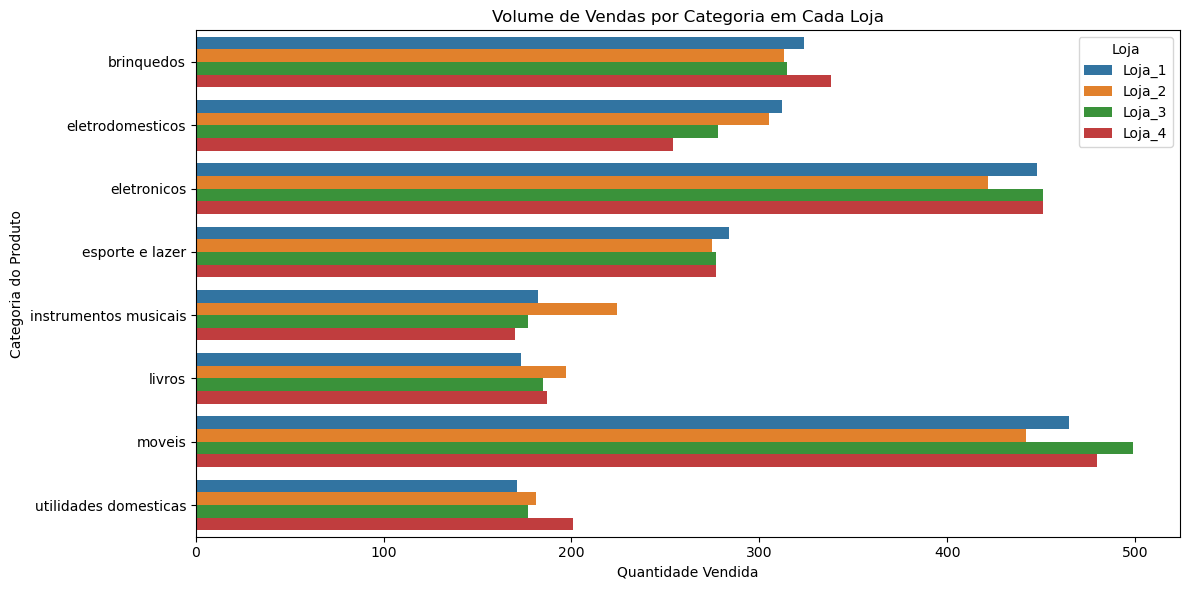

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_agg, x='quantidade_vendida', y='Categoria do Produto', hue='loja', dodge=True)
plt.title('Volume de Vendas por Categoria em Cada Loja')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Categoria do Produto')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()


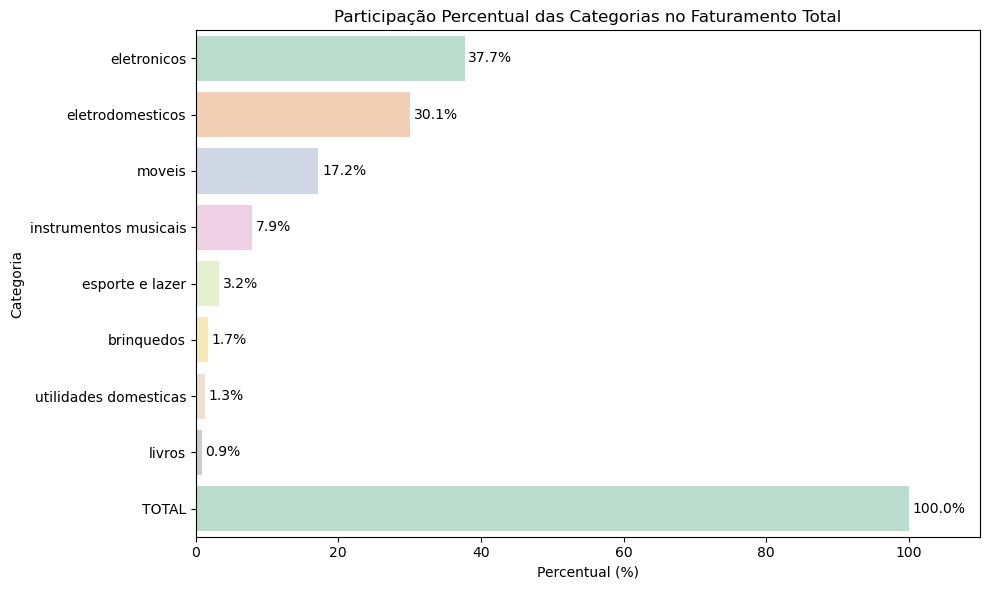

In [ ]:
# Agrupa por categoria para somar o faturamento
faturamento_categoria = df_geral.groupby('Categoria do Produto')['Preço'].sum().reset_index()

# Calcula o percentual de participação de cada categoria
faturamento_categoria['percentual'] = (faturamento_categoria['Preço'] / faturamento_categoria['Preço'].sum()) * 100

# Ordena para ficar visualmente organizado
faturamento_categoria = faturamento_categoria.sort_values('percentual', ascending=False)

# Adiciona linha TOTAL para visual referência
linha_total = pd.DataFrame({
    'Categoria do Produto': ['TOTAL'],
    'Preço': [faturamento_categoria['Preço'].sum()],
    'percentual': [100.0]
})
faturamento_categoria = pd.concat([faturamento_categoria, linha_total], ignore_index=True)

# Gera o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=faturamento_categoria,
    x='percentual',
    y='Categoria do Produto',
    palette='Pastel2',
    hue='Categoria do Produto',
    dodge=False,
    legend=False
)

# 6️⃣ Insere os rótulos com os percentuais
for i, row in faturamento_categoria.iterrows():
    plt.text(row['percentual'] + 0.5, i, f"{row['percentual']:.1f}%", va='center')

plt.xlim(0, 110)
plt.title('Participação Percentual das Categorias no Faturamento Total')
plt.xlabel('Percentual (%)')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()


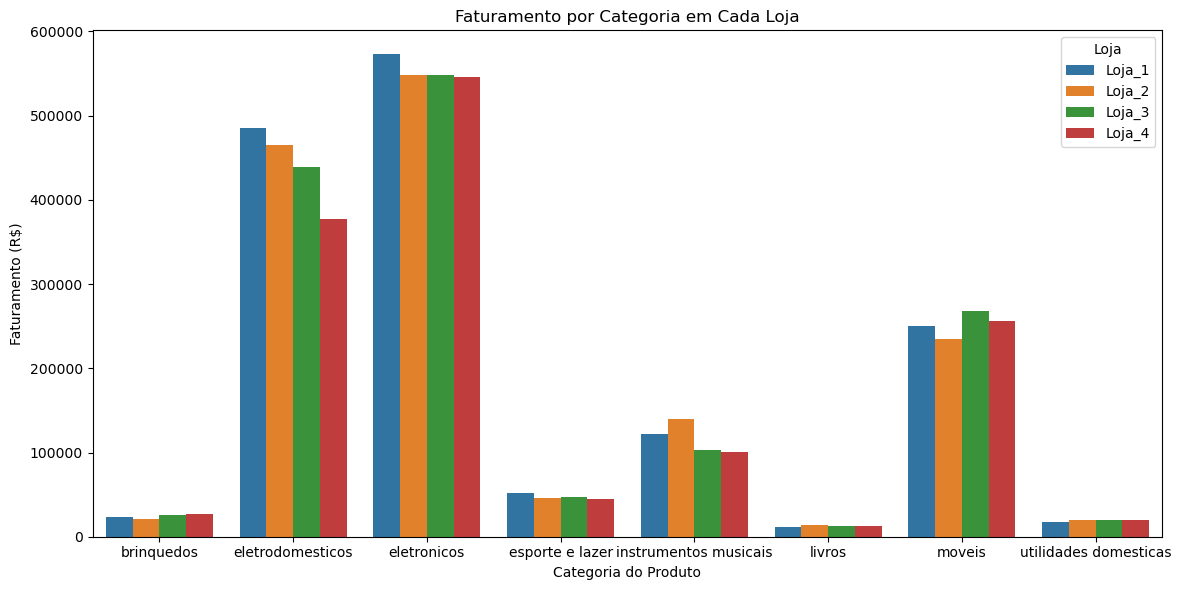

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_agg, x='Categoria do Produto', y='faturamento', hue='loja', dodge=True)
plt.title('Faturamento por Categoria em Cada Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Faturamento (R$)')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()

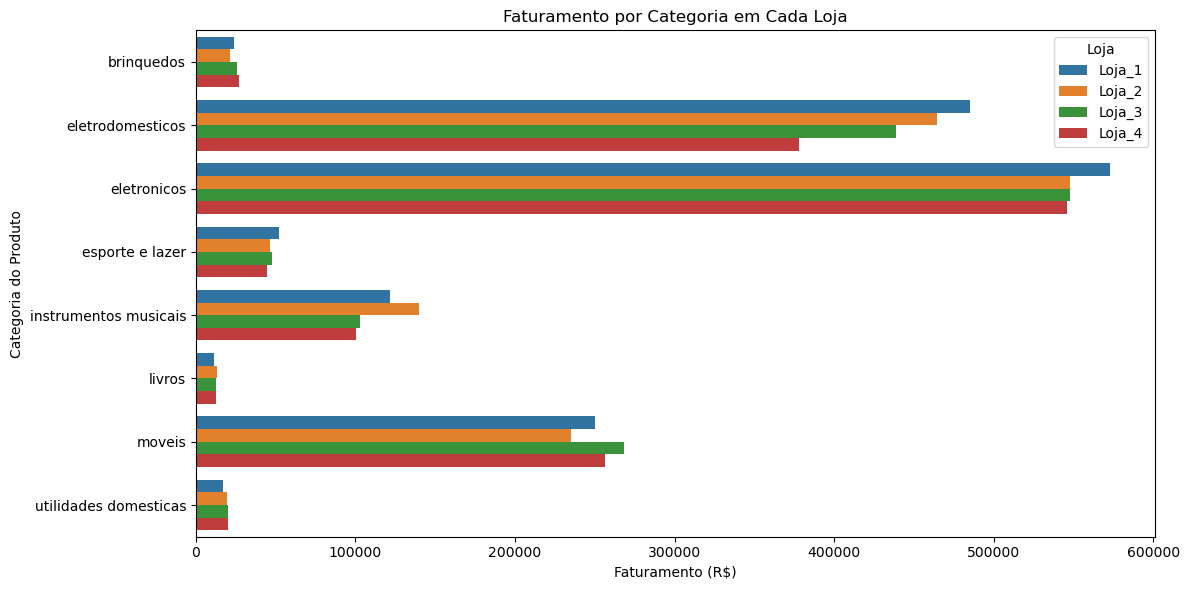

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_agg, x='faturamento', y='Categoria do Produto', hue='loja', dodge=True)
plt.title('Faturamento por Categoria em Cada Loja')
plt.xlabel('Faturamento (R$)')
plt.ylabel('Categoria do Produto')
plt.legend(title='Loja')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
# Agrupamento por Vendedor
avaliacao_por_vendedor = df_geral.groupby('Vendedor')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
avaliacao_por_vendedor = avaliacao_por_vendedor.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Loja
avaliacao_por_loja = df_geral.groupby('loja')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
avaliacao_por_loja = avaliacao_por_loja.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Local da compra
avaliacao_por_local = df_geral.groupby('Local da compra')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
avaliacao_por_local = avaliacao_por_local.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Agrupamento por Produto
avaliacao_por_produto = df_geral.groupby('Produto')['Avaliação da compra'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)
avaliacao_por_produto = avaliacao_por_produto.rename(columns={'count': 'Qtd Avaliações', 'mean': 'Média Avaliação'})

# Exibição dos TOP 5
print("Top 5 Vendedores:")
avaliacao_por_vendedor.head()

print("\nTop 5 Lojas:")
print(avaliacao_por_loja.head())

print("\nTop 5 Locais de Compra:")
print(avaliacao_por_local.head())

print("\nTop 5 Produtos:")
print(avaliacao_por_produto.head())


Top 5 Vendedores:
                  Qtd Avaliações  Média Avaliação
Vendedor                                         
Bruno Rodrigues              684         4.134503
Felipe Santos                701         4.075606
Mariana Ferreira             656         4.071646
Rafael Costa                 625         4.064000
Beatriz Moraes               650         4.047692

Top 5 Lojas:
        Qtd Avaliações  Média Avaliação
loja                                   
Loja_3            2359         4.048326
Loja_2            2359         4.037304
Loja_4            2358         3.995759
Loja_1            2359         3.976685

Top 5 Locais de Compra:
                 Qtd Avaliações  Média Avaliação
Local da compra                                 
RN                           48         4.208333
SP                         3943         4.113619
MT                           80         4.112500
MS                           82         4.097561
MG                         1102         4.090744

Top 5 Pro

In [32]:
# Converter para datetime real
faturamento_mensal['AnoMes'] = faturamento_mensal['AnoMes'].astype(str)
faturamento_mensal['AnoMes'] = pd.to_datetime(faturamento_mensal['AnoMes'])

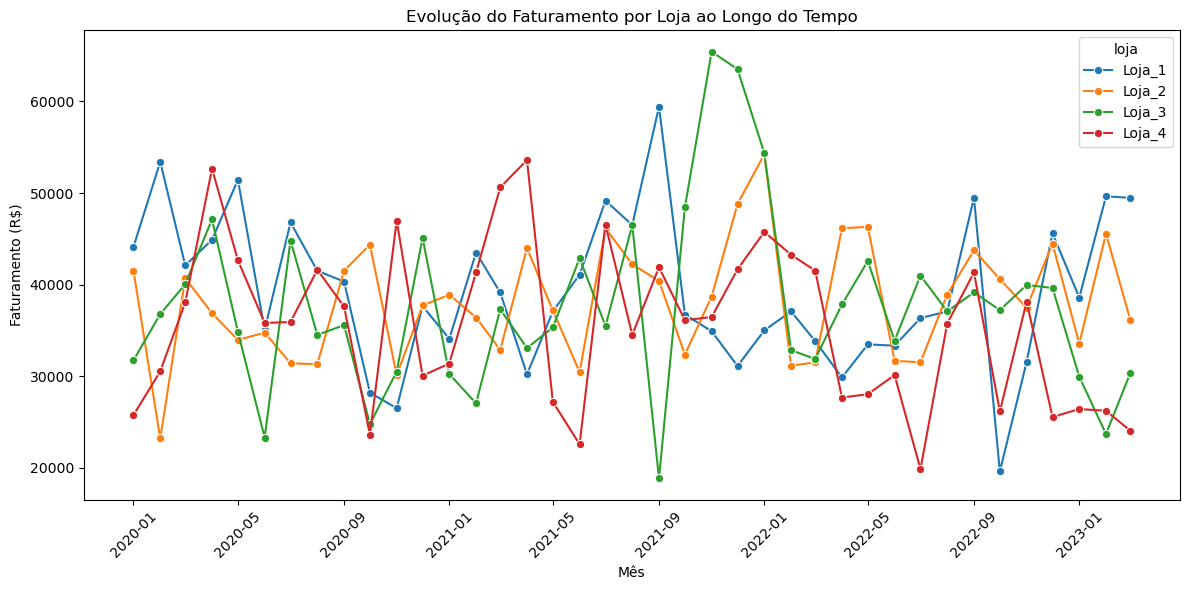

In [33]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.lineplot(data=faturamento_mensal, x='AnoMes', y='Preço', hue='loja', marker='o')

plt.title('Evolução do Faturamento por Loja ao Longo do Tempo')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


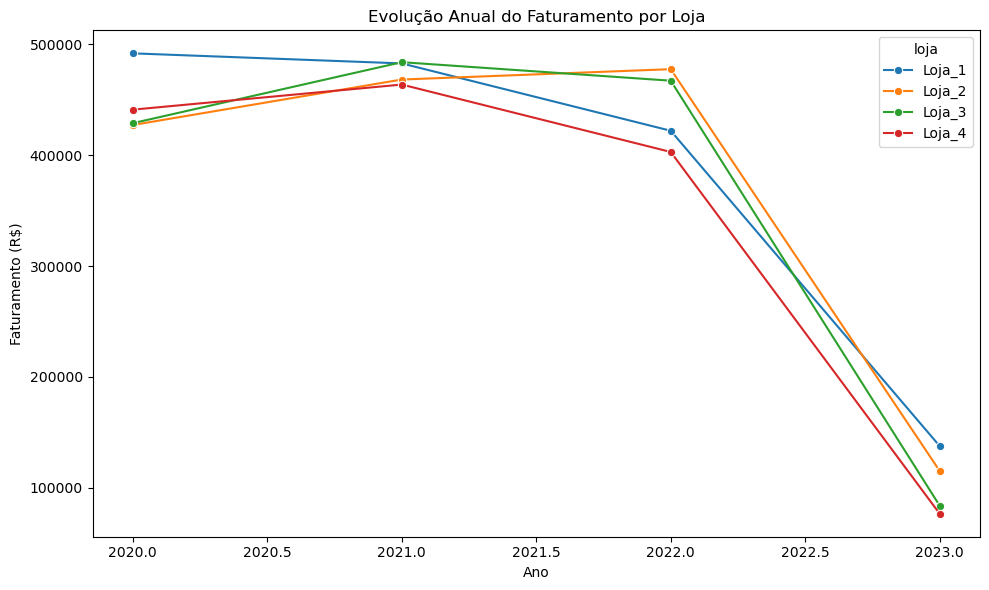

In [34]:
# Garantir que a coluna de data está em datetime
df_geral['Data da Compra'] = pd.to_datetime(df_geral['Data da Compra'])

# Criar a coluna Ano
df_geral['Ano'] = df_geral['Data da Compra'].dt.year

# Agregar faturamento por loja e ano
faturamento_anual = df_geral.groupby(['Ano', 'loja'])['Preço'].sum().reset_index()

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=faturamento_anual, x='Ano', y='Preço', hue='loja', marker='o')

plt.title('Evolução Anual do Faturamento por Loja')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Ano')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21188\4203938264.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Usuario\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


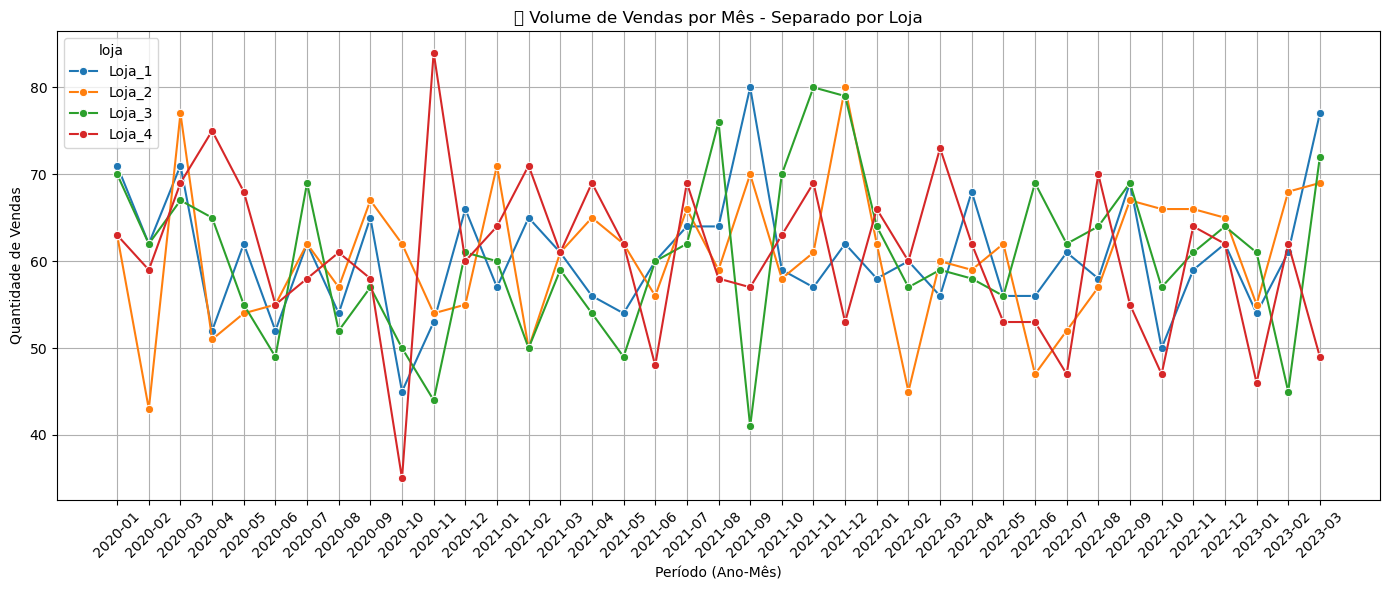

In [35]:
# Garantir que a coluna de data está em datetime
df_geral['Data da Compra'] = pd.to_datetime(df_geral['Data da Compra'])

# Criar coluna Ano-Mês
df_geral['AnoMes'] = df_geral['Data da Compra'].dt.to_period('M').astype(str)

# Contar quantidade de vendas por loja e mês
vendas_mensais = df_geral.groupby(['AnoMes', 'loja']).size().reset_index(name='Quantidade de Vendas')

# Plotar gráfico de linha
plt.figure(figsize=(14, 6))
sns.lineplot(data=vendas_mensais, x='AnoMes', y='Quantidade de Vendas', hue='loja', marker='o')

plt.title('📈 Volume de Vendas por Mês - Separado por Loja')
plt.xlabel('Período (Ano-Mês)')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


# 4. Produtos Mais e Menos Vendidos

### Análise de Produtos Mais Vendidos - Por Loja e Geral

In [36]:
# 1️⃣ Top 10 produtos mais vendidos
top10_produtos = df_geral['Produto'].value_counts().head(10).index

# 2️⃣ Filtrar apenas os dados desses produtos
df_top10 = df_geral[df_geral['Produto'].isin(top10_produtos)]

# 3️⃣ Agrupar por Produto e Loja (para ver onde vende mais)
produto_loja = df_top10.groupby(['Produto', 'loja']).size().reset_index(name='quantidade_vendida')

# 4️⃣ Pivotar a tabela para facilitar a visualização
tabela_final = produto_loja.pivot(index='Produto', columns='loja', values='quantidade_vendida').fillna(0).astype(int)

# 5️⃣ Adicionar total por produto
tabela_final['TOTAL'] = tabela_final.sum(axis=1)

# 6️⃣ Reordenar pela coluna TOTAL (do maior pro menor)
tabela_final = tabela_final.sort_values(by='TOTAL', ascending=False)

# Exibir a tabela final
tabela_final


loja,Loja_1,Loja_2,Loja_3,Loja_4,TOTAL
Produto,,,,,
Cômoda,56,44,55,55,210
Carrinho controle remoto,52,47,52,55,206
Micro-ondas,60,62,36,48,206
Bateria,53,61,41,48,203
Cama king,44,45,56,56,201
Jogo de panelas,43,52,55,50,200
Modelagem preditiva,51,46,53,50,200
Secadora de roupas,58,57,45,40,200
Blocos de montar,56,54,35,54,199


### Análise de Produtos Menos Vendidos - Por Loja e Geral

In [37]:
# 1️⃣ Top 10 produtos menos vendidos
top10_produtos = df_geral['Produto'].value_counts().tail(10).index

# 2️⃣ Filtrar apenas os dados desses produtos
df_top10 = df_geral[df_geral['Produto'].isin(top10_produtos)]

# 3️⃣ Agrupar por Produto e Loja (para ver onde vende mais)
produto_loja = df_top10.groupby(['Produto', 'loja']).size().reset_index(name='quantidade_vendida')

# 4️⃣ Pivotar a tabela para facilitar a visualização
tabela_final = produto_loja.pivot(index='Produto', columns='loja', values='quantidade_vendida').fillna(0).astype(int)

# 5️⃣ Adicionar total por produto
tabela_final['TOTAL'] = tabela_final.sum(axis=1)

# 6️⃣ Reordenar pela coluna TOTAL (do maior pro menor)
tabela_final = tabela_final.sort_values(by='TOTAL', ascending=True)

# Exibir a tabela final
tabela_final


loja,Loja_1,Loja_2,Loja_3,Loja_4,TOTAL
Produto,,,,,
Celular ABXY,33,41,44,39,157
Headset,33,44,39,42,158
Mochila,39,45,36,43,163
Guitarra,47,47,38,33,165
Ciência de dados com python,39,43,46,38,166
Assistente virtual,40,38,39,50,167
Poltrona,41,35,47,45,168
Jogo de copos,41,46,36,46,169
Panela de pressão,35,44,47,46,172


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21188\971776986.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_10_produtos.values, y=bottom_10_produtos.index, ax=axs[1], palette="magma")


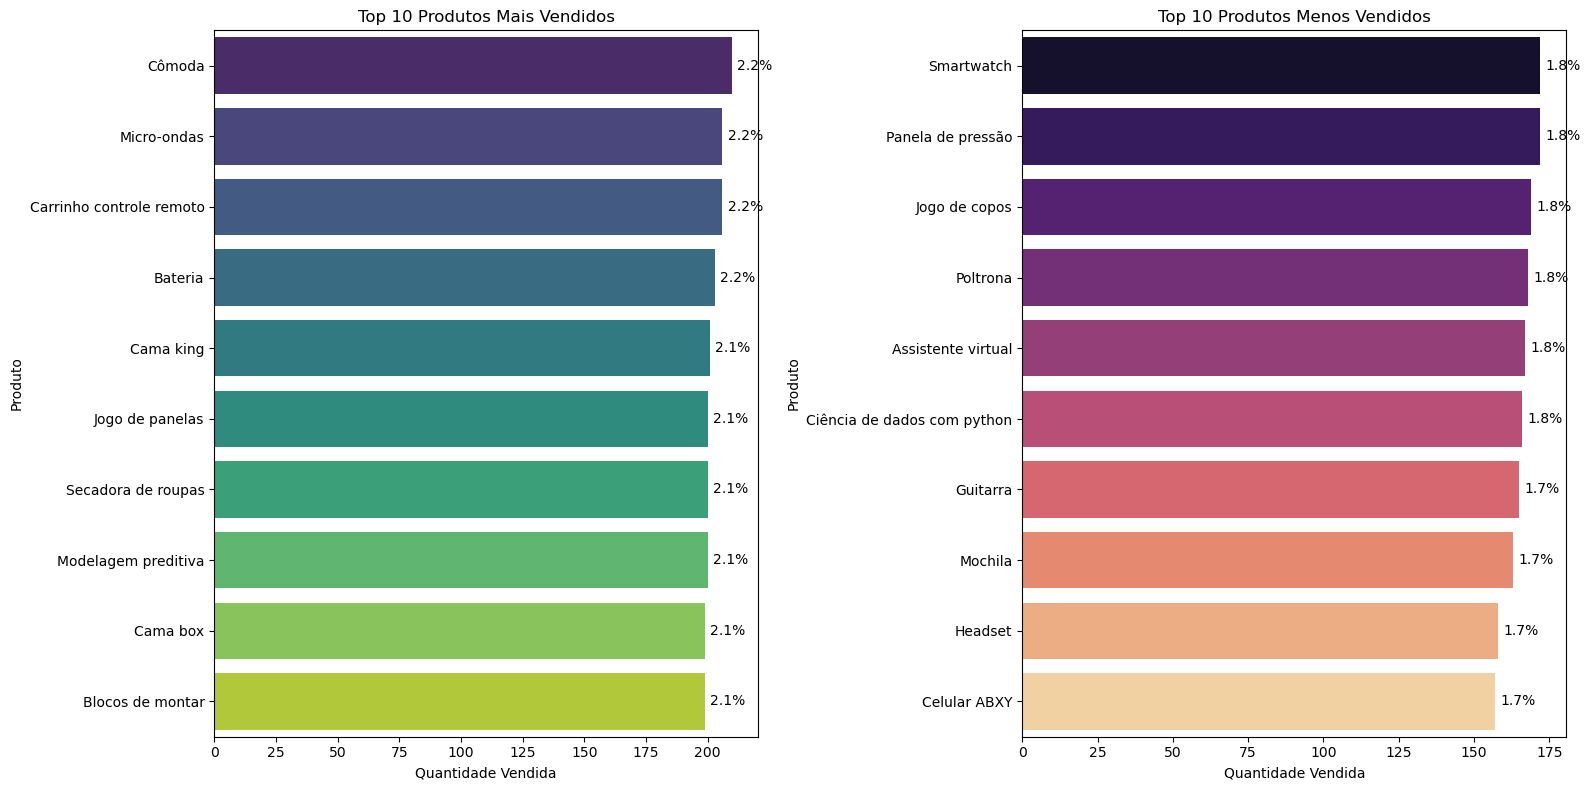

In [38]:
# 1. Calcular as contagens de vendas por produto e o total geral
produtos_counts = df_geral['Produto'].value_counts()
total_vendas = df_geral['Produto'].count()

# 2. Selecionar os 10 produtos mais vendidos
top_10_produtos = produtos_counts.head(10)
top_10_percent = (top_10_produtos / total_vendas) * 100

# 3. Selecionar os 10 produtos menos vendidos
bottom_10_produtos = produtos_counts.tail(10)
bottom_10_percent = (bottom_10_produtos / total_vendas) * 100

# 4. Criar os gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico 1: Top 10 Produtos Mais Vendidos
#sns.barplot(x=top_10_produtos.values, y=top_10_produtos.index, ax=axs[0], palette="viridis")
sns.barplot(x=top_10_produtos.values, y=top_10_produtos.index, ax=axs[0], hue=top_10_produtos.index, palette="viridis", legend=False)
axs[0].set_title('Top 10 Produtos Mais Vendidos')
axs[0].set_xlabel('Quantidade Vendida')
axs[0].set_ylabel('Produto')

# Adicionar rótulos com percentual em cada barra
for i, v in enumerate(top_10_produtos.values):
    axs[0].text(v + max(top_10_produtos.values)*0.01, i, f"{top_10_percent.iloc[i]:.1f}%", va='center', fontsize=10)

# Gráfico 2: Top 10 Produtos Menos Vendidos
sns.barplot(x=bottom_10_produtos.values, y=bottom_10_produtos.index, ax=axs[1], palette="magma")
axs[1].set_title('Top 10 Produtos Menos Vendidos')
axs[1].set_xlabel('Quantidade Vendida')
axs[1].set_ylabel('Produto')

# Adicionar rótulos com percentual em cada barra
for i, v in enumerate(bottom_10_produtos.values):
    axs[1].text(v + max(bottom_10_produtos.values)*0.01, i, f"{bottom_10_percent.iloc[i]:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21188\1089611541.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_mais, y='Produto', x='Quantidade', palette='Greens_d', ax=axs[0])


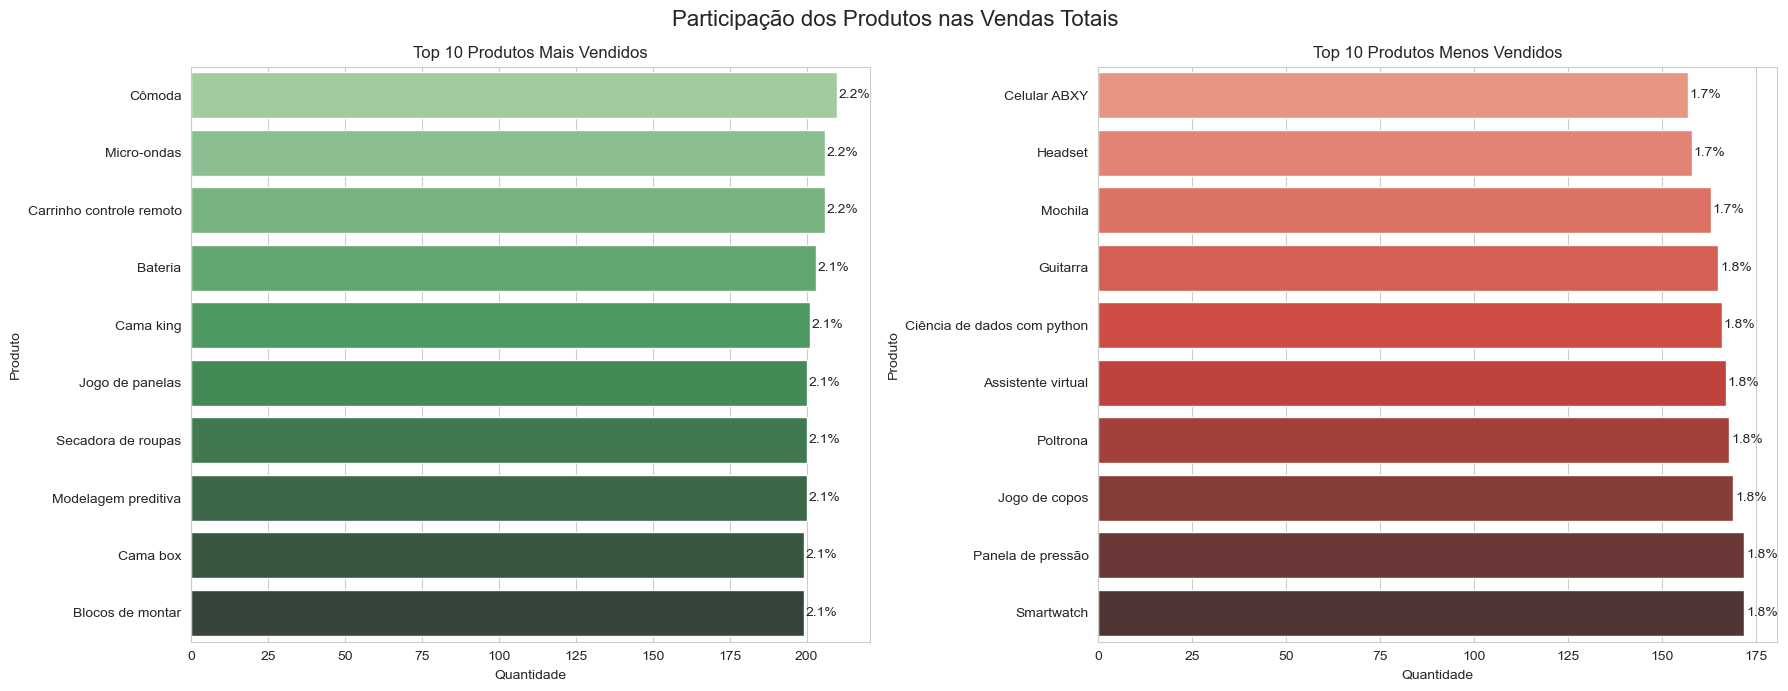

In [39]:
# 👇 Ajuste conforme o nome real da coluna de produtos
contagem_produtos = df_geral['Produto'].value_counts()

# 🔟 Top 10 Mais Vendidos e Menos Vendidos
mais_vendidos = contagem_produtos.head(10)
menos_vendidos = contagem_produtos.sort_values(ascending=True).head(10)

# 📊 Cálculo do percentual
total_vendas = contagem_produtos.sum()

mais_vendidos_percentual = (mais_vendidos / total_vendas * 100).round(2)
menos_vendidos_percentual = (menos_vendidos / total_vendas * 100).round(2)

# 🔄 Conversão para DataFrame para facilitar plotagem
df_mais = pd.DataFrame({
    'Produto': mais_vendidos.index,
    'Quantidade': mais_vendidos.values,
    'Percentual': mais_vendidos_percentual.values
})

df_menos = pd.DataFrame({
    'Produto': menos_vendidos.index,
    'Quantidade': menos_vendidos.values,
    'Percentual': menos_vendidos_percentual.values
})

# 🎨 Estética dos gráficos
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# 📈 Gráfico de Produtos Mais Vendidos
sns.barplot(data=df_mais, y='Produto', x='Quantidade', palette='Greens_d', ax=axs[0])
axs[0].set_title('Top 10 Produtos Mais Vendidos')
for i, row in df_mais.iterrows():
    axs[0].text(row['Quantidade'] + 0.5, i, f"{row['Percentual']:.1f}%", va='center')

# 📉 Gráfico de Produtos Menos Vendidos
#sns.barplot(data=df_menos, y='Produto', x='Quantidade', palette='Reds_d', ax=axs[1])
sns.barplot(data=df_menos, y='Produto', x='Quantidade', hue='Produto', palette='Reds_d', ax=axs[1], legend=False)
axs[1].set_title('Top 10 Produtos Menos Vendidos')
for i, row in df_menos.iterrows():
    axs[1].text(row['Quantidade'] + 0.5, i, f"{row['Percentual']:.1f}%", va='center')

plt.suptitle('Participação dos Produtos nas Vendas Totais', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21188\687822073.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_menos_valor, y='Produto', x='Faturamento', palette='Oranges_d', ax=axs[1], legend=False)


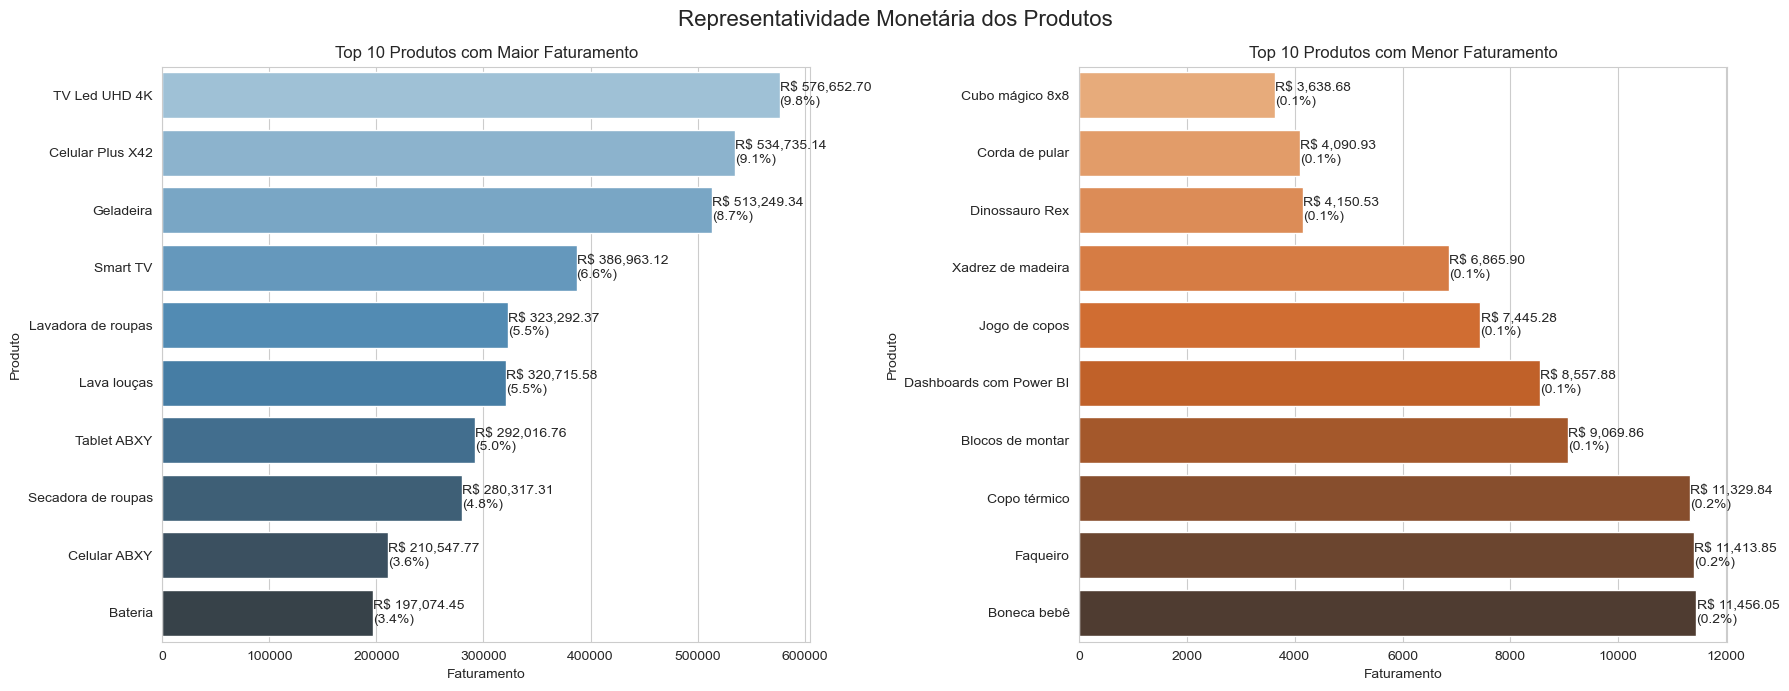

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 👇 Substitua pelos nomes reais das colunas no seu DataFrame
# Produto: nome do produto
# Preço: valor monetário da venda

# 📊 Agrupando faturamento total por produto
faturamento_por_produto = df_geral.groupby('Produto')['Preço'].sum().sort_values(ascending=False)

# 🔟 Top 10 em faturamento (mais e menos)
top_mais_valor = faturamento_por_produto.head(10)
top_menos_valor = faturamento_por_produto.sort_values(ascending=True).head(10)

# 💰 Cálculo do total geral para percentual
faturamento_total = faturamento_por_produto.sum()

top_mais_percent = (top_mais_valor / faturamento_total * 100).round(2)
top_menos_percent = (top_menos_valor / faturamento_total * 100).round(2)

# 🔄 DataFrames para plotagem
df_mais_valor = pd.DataFrame({
    'Produto': top_mais_valor.index,
    'Faturamento': top_mais_valor.values,
    'Percentual': top_mais_percent.values
})

df_menos_valor = pd.DataFrame({
    'Produto': top_menos_valor.index,
    'Faturamento': top_menos_valor.values,
    'Percentual': top_menos_percent.values
})

# 🎨 Gráficos lado a lado
sns.set_style('whitegrid')
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# 💵 Mais Faturamento
sns.barplot(data=df_mais_valor, y='Produto', x='Faturamento', hue='Produto', palette='Blues_d', ax=axs[0])
axs[0].set_title('Top 10 Produtos com Maior Faturamento')
for i, row in df_mais_valor.iterrows():
    axs[0].text(row['Faturamento'] + 50, i, f"R$ {row['Faturamento']:,.2f}\n({row['Percentual']:.1f}%)", va='center')

# 💸 Menos Faturamento
sns.barplot(data=df_menos_valor, y='Produto', x='Faturamento', palette='Oranges_d', ax=axs[1], legend=False)
axs[1].set_title('Top 10 Produtos com Menor Faturamento')
for i, row in df_menos_valor.iterrows():
    axs[1].text(row['Faturamento'] + 2, i, f"R$ {row['Faturamento']:,.2f}\n({row['Percentual']:.1f}%)", va='center')

plt.suptitle('Representatividade Monetária dos Produtos', fontsize=16)
plt.tight_layout()
plt.show()


In [41]:
# Agrupando informações por produto
grupo_produtos = df_geral.groupby('Produto').agg(
    Qtde_Vendida=('Produto', 'count'),
    Faturamento_Total=('Preço', 'sum'),
)

# Calcula o ticket médio
grupo_produtos['Ticket_Medio'] = grupo_produtos['Faturamento_Total'] / grupo_produtos['Qtde_Vendida']

# Ordena pelos mais vendidos
tabela_top10 = grupo_produtos.sort_values(by='Qtde_Vendida', ascending=False).head(30)

# Formata os valores
tabela_top10['Faturamento_Total'] = tabela_top10['Faturamento_Total'].map(lambda x: f"R$ {x:,.2f}")
tabela_top10['Ticket_Medio'] = tabela_top10['Ticket_Medio'].map(lambda x: f"R$ {x:,.2f}")

# Renomeia as colunas para exibição final
tabela_top10 = tabela_top10.rename(columns={
    'Qtde_Vendida': 'Qtde Vendida',
    'Faturamento_Total': 'Faturamento Total',
    'Ticket_Medio': 'Ticket Médio'
})

# Exibe a tabela
tabela_top10.reset_index()


,Produto,Qtde Vendida,Faturamento Total,Ticket Médio
0,Cômoda,210,"R$ 77,892.33",R$ 370.92
1,Carrinho controle remoto,206,"R$ 19,690.62",R$ 95.59
2,Micro-ondas,206,"R$ 154,267.24",R$ 748.87
3,Bateria,203,"R$ 197,074.45",R$ 970.81
4,Cama king,201,"R$ 181,040.36",R$ 900.70
5,Modelagem preditiva,200,"R$ 16,820.71",R$ 84.10
6,Jogo de panelas,200,"R$ 40,675.34",R$ 203.38
7,Secadora de roupas,200,"R$ 280,317.31","R$ 1,401.59"
8,Blocos de montar,199,"R$ 9,069.86",R$ 45.58
9,Cama box,199,"R$ 138,797.42",R$ 697.47


# 5. Frete Médio por Loja


In [ ]:
# Calcular o custo médio de frete por loja
frete_medio_por_loja = df_geral.groupby('loja')['Frete'].mean().sort_values(ascending=False).reset_index(0)

# Exibir a tabela com os resultados
frete_medio_por_loja

loja
Loja_1    34.691805
Loja_2    33.621941
Loja_3    33.074464
Loja_4    31.278997
Name: Frete, dtype: float64

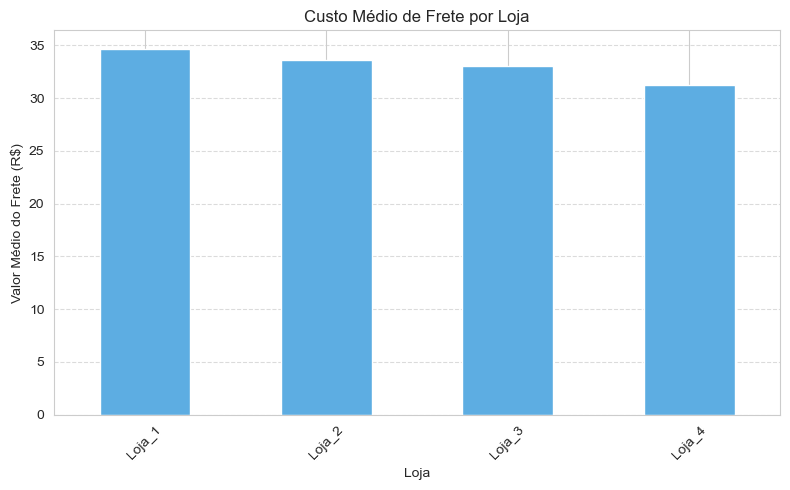

In [43]:
# Plotando o gráfico
plt.figure(figsize=(8, 5))
frete_medio_por_loja.plot(kind='bar', color='#5DADE2')

plt.title('Custo Médio de Frete por Loja')
plt.ylabel('Valor Médio do Frete (R$)')
plt.xlabel('Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Custo médio de frete por loja
frete_medio = df_geral.groupby('loja')['Frete'].mean()

# Avaliação média por loja
avaliacao_media = df_geral.groupby('loja')['Avaliação da compra'].mean()

# Juntando os dados em um DataFrame
comparativo = pd.DataFrame({
    'Frete Médio': frete_medio,
    'Avaliação Média': avaliacao_media
}).sort_values('Frete Médio', ascending=False)

comparativo.round(2)


,Frete Médio,Avaliação Média
loja,,
Loja_1,34.692,3.977
Loja_2,33.622,4.037
Loja_3,33.074,4.048
Loja_4,31.279,3.996


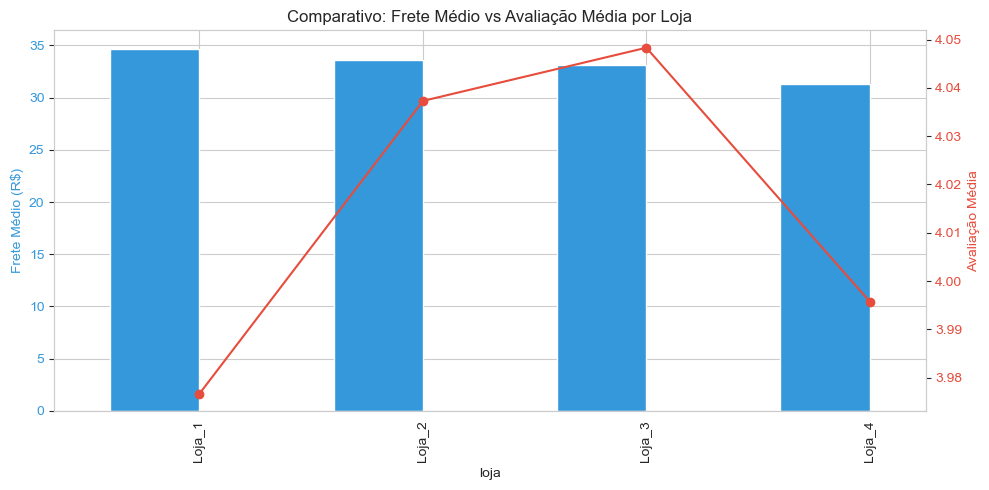

In [98]:
# Gráfico com 2 eixos (frete e avaliação)
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barras para o frete
comparativo['Frete Médio'].plot(kind='bar', color='#3498db', ax=ax1, position=1, width=0.4)
ax1.set_ylabel('Frete Médio (R$)', color='#3498db')
ax1.tick_params(axis='y', labelcolor='#3498db')

# Linha para avaliação
ax2 = ax1.twinx()
comparativo['Avaliação Média'].plot(kind='line', color='#e74c3c', marker='o', ax=ax2)
ax2.set_ylabel('Avaliação Média', color='#e74c3c')
ax2.tick_params(axis='y', labelcolor='#e74c3c')

plt.title('Comparativo: Frete Médio vs Avaliação Média por Loja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


In [46]:
# Filtrar os dados da loja com pior avaliação
loja_alvo = comparativo['Avaliação Média'].idxmin()
df_loja = df_geral[df_geral['loja'] == loja_alvo]

# Avaliação média por produto nessa loja
avaliacao_por_produto = df_loja.groupby('Produto')['Avaliação da compra'].mean().sort_values()

# Mostrar os 10 produtos com pior avaliação
print(avaliacao_por_produto.head(10))


Produto
Jogo de copos          3.292683
Jogo de panelas        3.581395
Corda de pular         3.625000
Fone de ouvido         3.640000
Modelagem preditiva    3.647059
Panela de pressão      3.771429
Cama king              3.772727
Dinossauro Rex         3.775000
Mesa de jantar         3.800000
Cômoda                 3.803571
Name: Avaliação da compra, dtype: float64


In [47]:
# Comparar a avaliação média do mesmo produto entre lojas
produto_problema = avaliacao_por_produto.idxmin()
avaliacao_por_loja = df_geral[df_geral['Produto'] == produto_problema].groupby('loja')['Avaliação da compra'].mean()

print(f"Avaliações do produto '{produto_problema}' por loja:")
print(avaliacao_por_loja)


Avaliações do produto 'Jogo de copos' por loja:
loja
Loja_1    3.292683
Loja_2    4.021739
Loja_3    4.027778
Loja_4    4.043478
Name: Avaliação da compra, dtype: float64


In [48]:
# Agrupando por Produto e calculando a média e contagem de avaliações
avaliacoes_produtos = df_geral.groupby('Produto')['Avaliação da compra'].agg(['mean', 'count']).reset_index()

# Renomeando as colunas
avaliacoes_produtos.columns = ['Produto', 'Média Avaliação', 'Qtd Vendas']

# Filtrando produtos com pelo menos X vendas para garantir confiabilidade (ex: 10)
avaliacoes_filtradas = avaliacoes_produtos[avaliacoes_produtos['Qtd Vendas'] >= 10]

# Ordenando pelos mais bem avaliados
produtos_melhor_avaliados = avaliacoes_filtradas.sort_values(by='Média Avaliação', ascending=False).head(10)

produtos_melhor_avaliados


,Produto,Média Avaliação,Qtd Vendas
27,Impressora,4.239362,188
31,Jogo de tabuleiro,4.217143,175
42,Poltrona,4.178571,168
23,Geladeira,4.162304,191
28,Iniciando em programação,4.133333,195
1,Bateria,4.133005,203
3,Blocos de montar,4.110553,199
32,Kit banquetas,4.106383,188
50,Xadrez de madeira,4.105556,180
10,Carrinho controle remoto,4.097087,206


In [49]:
# Juntando Produto, Avaliação e Loja
produtos_lojas_avaliacoes = df_geral.groupby(['Produto', 'loja'])['Avaliação da compra'].mean().reset_index()

# Filtrar só os top produtos
top_produtos = produtos_melhor_avaliados['Produto'].tolist()
produtos_lojas_avaliacoes = produtos_lojas_avaliacoes[produtos_lojas_avaliacoes['Produto'].isin(top_produtos)]

produtos_lojas_avaliacoes


,Produto,loja,Avaliação da compra
4,Bateria,Loja_1,4.188679
5,Bateria,Loja_2,4.032787
6,Bateria,Loja_3,3.975610
7,Bateria,Loja_4,4.333333
12,Blocos de montar,Loja_1,4.089286
13,Blocos de montar,Loja_2,4.277778
14,Blocos de montar,Loja_3,4.342857
15,Blocos de montar,Loja_4,3.814815
40,Carrinho controle remoto,Loja_1,4.134615
41,Carrinho controle remoto,Loja_2,4.127660


In [50]:
# Agrupamento por produto para calcular os indicadores
produto_analise = df_geral.groupby('Produto').agg(
    volume_vendas=('Produto', 'count'),
    faturamento_total=('Preço', 'sum'),
    frete_medio=('Frete', 'mean'),
    avaliacao_media=('Avaliação da compra', 'mean')
).reset_index()

# Ordenar os produtos com mais faturamento
produto_analise = produto_analise.sort_values(by='faturamento_total', ascending=False)

# Mostrar os top 10 produtos com maior faturamento
produto_analise.head(10)


,Produto,volume_vendas,faturamento_total,frete_medio,avaliacao_media
47,TV Led UHD 4K,187,576652.70,164.248782,3.994652
12,Celular Plus X42,198,534735.14,144.069410,3.959596
23,Geladeira,191,513249.34,142.794096,4.162304
44,Smart TV,192,386963.12,107.224182,3.963542
34,Lavadora de roupas,176,323292.37,97.642164,3.943182
33,Lava louças,189,320715.58,90.358817,3.957672
48,Tablet ABXY,179,292016.76,87.214043,3.955307
43,Secadora de roupas,200,280317.31,74.630056,4.015000
11,Celular ABXY,157,210547.77,71.439472,4.050955
1,Bateria,203,197074.45,51.722241,4.133005


In [51]:
df_geral.columns.values

array(['Produto', 'Categoria do Produto', 'Preço', 'Frete',
       'Data da Compra', 'Vendedor', 'Local da compra',
       'Avaliação da compra', 'Tipo de pagamento',
       'Quantidade de parcelas', 'lat', 'lon', 'loja', 'AnoMes', 'Ano'],
      dtype=object)

In [85]:
estados_clientes = ['Local da compra', 'Produto', 'Categoria do Produto', 'Preço', 'loja', 'Região', 'Ano']

In [87]:
vendasPorEstadosSelecionados = df_geral.filter(items=estados_clientes)

In [90]:
vendasPorAnoSelecionado = df_geral.filter(items=estados_clientes)

In [88]:
vendasPorEstadosSelecionados.head()

,Local da compra,Produto,Categoria do Produto,Preço,loja,Região,Ano
0,SP,Assistente virtual,eletronicos,219.08,Loja_1,Sudeste,2021
1,RJ,Mesa de jantar,moveis,256.35,Loja_1,Sudeste,2022
2,DF,Jogo de tabuleiro,brinquedos,279.51,Loja_1,Centro-Oeste,2021
3,RS,Micro-ondas,eletrodomesticos,1009.99,Loja_1,Sul,2022
4,MG,Cadeira de escritório,moveis,446.99,Loja_1,Sudeste,2020


In [91]:
vendas_por_ano = vendasPorAnoSelecionado['Ano']

In [95]:
distVendasPorAno = vendas_por_ano.value_counts()

In [96]:
distVendasPorAno

Ano
2021    2982
2022    2873
2020    2861
2023     719
Name: count, dtype: int64

In [75]:
vendas_por_estado = vendasPorEstadosSelecionados['Local da compra']

In [76]:
distVendasPorEstado = vendas_por_estado.value_counts()

In [77]:
distVendasPorEstado

Local da compra
SP    3943
RJ    1212
MG    1102
RS     534
PR     473
SC     346
BA     310
DF     242
GO     186
PE     181
ES     171
CE     151
MS      82
PA      81
MT      80
MA      62
RN      48
PB      46
AL      41
PI      40
TO      29
SE      28
RO      19
AM      14
AP       9
AC       3
RR       2
Name: count, dtype: int64

In [78]:
percentualVendasPorEstado = ((distVendasPorEstado / distVendasPorEstado.sum()) * 100).round(2)
print(percentualVendasPorEstado)

Local da compra
SP    41.79
RJ    12.85
MG    11.68
RS     5.66
PR     5.01
SC     3.67
BA     3.29
DF     2.56
GO     1.97
PE     1.92
ES     1.81
CE     1.60
MS     0.87
PA     0.86
MT     0.85
MA     0.66
RN     0.51
PB     0.49
AL     0.43
PI     0.42
TO     0.31
SE     0.30
RO     0.20
AM     0.15
AP     0.10
AC     0.03
RR     0.02
Name: count, dtype: float64


In [79]:
vendas_por_regiao = vendasPorEstadosSelecionados['Região']

In [80]:
distVendasPorRegiao = vendasPorEstadosSelecionados['Região']

In [81]:
distVendasPorRegiao = vendas_por_regiao.value_counts()

In [82]:
distVendasPorRegiao

Região
Sudeste         6428
Sul             1353
Nordeste         907
Centro-Oeste     590
Norte            157
Name: count, dtype: int64

In [83]:
percentualVendasPorRegiao = ((distVendasPorRegiao / distVendasPorRegiao.sum()) * 100).round(2)
print(percentualVendasPorRegiao)

Região
Sudeste         68.13
Sul             14.34
Nordeste         9.61
Centro-Oeste     6.25
Norte            1.66
Name: count, dtype: float64


<Axes: >

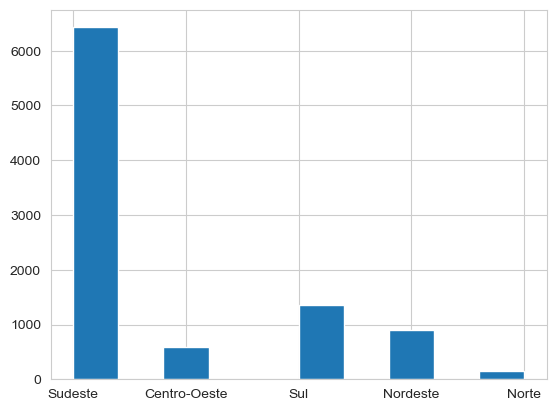

In [84]:
vendas_por_regiao.hist()

# Relatório do Projeto